In [ ]:
! pip install pycebox
! pip install git+https://github.com/MaximeJumelle/ALEPython.git@dev#egg=alepython

__Acknowledgment:__ The following discussion follows very closely the book [Interpretable Machine Learning ](https://christophm.github.io/interpretable-ml-book/) by Christoph Molnar, which is worth reading in full.

# What is model interpretability?

## Models as black boxes

The overwhelming majority of machine learning models belong to groups that implement very simple "data APIs", e.g., 

- supervised models output a  $\hat y$ prediction corresponding to an input $\mathbf x$ data point,
- clustering models can output the index of the cluster to which an input $\mathbf x$ belongs

etc., and the evaluation of the models is typically also based on the performance in terms of these operations, e.g., in the supervised case,

- there are various ways of comparing the model's predictions with the ground truth, and, it is also possible to consider the 
- memory and processing power requirements of the prediction process.

Even if we add training characteristics to the mix (e.g., what are the memory and processing requirements to process new data points in the case of an online model), the "APIs"  and the metrics treat the models as __black boxes__: they do not provide any explanation of

- __why__ and/or __how__ a specific machine learning model produces the output it does.

## Interpretable models

Interpretable models have interpretations that provide 

- an account/explanation of __why__ the model responds with the given output to input data points, which has
- __sufficiently low complexity__ to be understandable to the target audience.

The second condition obviously makes the notion relative (as it depends on the target-audience), but our main focus in the following discussion will be an audience who is able to understand simple models like linear regression. We are also going to discuss a bit more sophisticated interpretations/explanations that require a degree of familiarity with the structure of the model in question (e.g., in the case of convolutional networks).

## What is a good explanation?

Some important features of good explanations in the context of model intepretations are

- __Contrastivity__: Many good explanations explain decisions by contrasting it with different outputs on (relatively) similar outputs. This supports __counterfactual__ conclusions, e.g. if the value of feature $f$ was different then the decision wouldn't be negative.

- __Selectivity__: Good explanations concentrate only on a few decisive factors.

- __Focus on the abnormal__: Among many roughly equally important factors, abnormal (rare factors) are more important to include in the explanation.

# Why do we need interpretability?

Explaining why and how a model produces its predictions is important and useful for a large number of purposes:

$\Rightarrow$ __Implicit requirements__

In most machine learning use cases, the task is not totally defined in terms of data sets and performance metrics on those data sets: there are a number of -- typically not explicitly stated -- expectations and criteria that the model has to satisfy. Explanations can make it clearer whether the model conforms to these implicit requirements, can help making them explicit, and motivate changes (both in the model and in the expectations).

$\Rightarrow$ __Trust and acceptance__
 
Interpretable/explainable model behavior can increase the trust and acceptance with regard to the model. This is especially important in the context of

- decision making about the initial deployment and the operation/maintenance of the model
- interaction with the "user community" -- people who are effected by the model's operation

$\Rightarrow$ __Are the factors that influence decisions the right ones?__

Interpretability can help to assess whether the model relationship between input features and output conforms to two highly important requirements:

+ __Fairness__: In most contexts, models shouldn't base their decisions on racial or gender biases, and should not discriminate minorities.
+ __Causality__:  It is a general, but often difficult to achieve, goal that as far as possible, models should base their decisions not just on (possibly spurious) correlations but on causal relationships.

$\Rightarrow$ __Interaction with the model__

Most models do not exist in a "social vacuum": their inputs and outputs participate in interactions with human "users". In these interactions it is very important that the interacting humans have a (possibly approximate) understanding of the model's operation. E.g., in the case of a credit rating model, it should be possible for an applicant to get at least a rudimentary explanation of why their credit request was rejected.


$\Rightarrow$ __Auditing and debugging__

Interpretability (possibly in more technical terms) is also very important when the model is audited and debugged -- "bugs" (obviously incorrect predictions etc.) are more easily fixed if there is an explanation how and why they arised.

## High vs low risk tasks

The above considerations are obviously more important/relevant in high-risk environments, where individual decisions based on the model's output can have serious negative consequences. On the other hand, in low-risk situations it can be acceptable to simply run a black box model with good enough relevant metrics.

## The dangers of interpretability and causal machine learning

In certain settings interpretability can lead to problems: people might use the model's interpretation to trick, manipulate the system into decisions favorable to them. A good  remedy against these problems is __ensuring that the model's outputs are based on genuine causal relationships instead of just correlations__: e.g., if a credit rating model can be "gamed" by changing something superficial (like a large one time transfer to the account which is returned a few days later), then this means that the model is not based on genuinely causally effective features.

# Interpretation method types

## Intrinsic vs post-model (post hoc)

Some models can be considered __intrinsically interpretable__: their structure and the inference they algorithmically perform is so simple that it can be explained in terms that is understandable for the general public. The main examples of such models are 

- (sufficiently sparse) linear models
- (sufficiently shallow) decision trees

For most most machine learning models this does not hold, in these cases the behavior of the trained model has to be interpreted with post-model interpretation methods.


## What is the result of the method?

Another important differentiator is the result of the method in question. It can be, among other things 

- __feature summary statistics__: these are statistical characterizations of the feature's connection to the output and to other features, e.g. the feature's importance in the output, or its correlation with other features.

- __feature summary visualization__: in some cases visualizing connections as a function graph plot is much more informative than just communicating some selected statistics, this is the case, e.g. in the case of partial dependency plots.

- __model internals__: these can be, e.g., straightforwardly interpretable internals (like linear model weights) in the case of intrinsically interpretable models, or internals of a non-transparent model, e.g., the filters learned by a convolutional network.

- __data points__: Interpretation can be helped by producing special data points, already existing in the available data sets or newly created (synthetic). E.g., an interpretation method can produce __prototypical data points__ for a classification model, or __counterfactual alternatives__ to existing data points.

- __intrinsically interpretable model__: if a model is not intrinsically interpretable then one interpretation solution is to approximate it with intrinsically interpretable models (e.g., a linear model). These models in turn can be interpreted with several methods, e.g. model internals or feature summary statistics.

## Model-specific vs model-agnostic

Some methods are model-specific, e.g., convolutional filter-related methods do not make sense for other types of models, while approximation with a linear model can be used independently of the model's internal structure.

## Local vs global

The scope of the explanation can be __local__, i.e., the output for a specific data point or specific groups of data points, or __global__, i.e. the method can explain the global behavior of the model on the data.

# How to interpret Intrinsically interpretable models?

## Linear regression

As we know, the prediction of a linear regression model has the form

$$
\hat y = w_0 + w_1x_1 + \dots + w_nx_n
$$
where the $x$s are the input features and the $w$s learned weights.

### The interpretation of weights

The interpretation of the model can begin with the interpretation of the learned weights:

- for numerical features, the corresponding weight tells by how much a unit change in the feature value changes the value of the prediction.

- for categoricals
    - if it is a binary, 1/0 encoded feature, then the weight specifies by how much the presence or absence of the feature changes (adds to or subtracts from) the predicted value.
    - if it is a categorical feature with multiple values then typically it will be one-hot encoded, and each value's weight can be interpreted analogously to the binary case.
    
- the value of the bias or intercept $w_0$ is typically only informative when the features are normalized. In this case, the bias can be interpreted as the value of $y$ for an "average" instance which has all features at the mean values.

### Ratio of explained variance

The metric
$$
R^2 = 1 - SSE / SST
$$
(where $SSE =\sum_{i=1}^n(y_i-\hat y_i)^2$ and $SST =\sum_{i=1}^n(y_i-\bar y)^2$) can be used to give a sense of how much explanatory power the model has.

### Confidence intervals and feature importance

Certain linear regression implementations are able to return standard error and confidence interval information about the estimated weights. 

This can be useful for visualizing the weights, e.g., 

In [ ]:
from sklearn.datasets import load_boston
import pandas as pd
boston = load_boston()
X, y = boston.data, boston.target
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
df = pd.DataFrame(X)
df.columns = ["Crimerate", "Residental", "Industrial", "Chas", "NOX", "Rooms", "Age", 
                "Distances", "Highways", "Tax", "Teachers", "Blacks", "Lowerstatus"]

df["Medval"] = y
df.head()

,Crimerate,Residental,Industrial,Chas,NOX,Rooms,Age,Distances,Highways,Tax,Teachers,Blacks,Lowerstatus,Medval
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
import statsmodels.api as sm

mod = sm.OLS(df.Medval, df.drop(columns=["Medval"]))
results = mod.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Medval   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              891.3
Date:                Tue, 12 May 2020   Prob (F-statistic):                        0.00
Time:                        14:10:00   Log-Likelihood:                         -1523.8
No. Observations:                 506   AIC:                                      3074.
Df Residuals:                     493   BIC:                                      3128.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Crimerate      -0.0929      0.034     -2.699      0.007      -0.161      -0.025
Residental      0.0487      0.014      3.382      0.001       0.020       0.077
Industrial     -0.0041      0.064     -0.063      0.950      -0.131       0.123
Chas            2.8540      0.904      3.157      0.002       1.078       4.630
NOX            -2.8684      3.359     -0.854      0.394      -9.468       3.731
Rooms           5.9281      0.309     19.178      0.000       5.321       6.535
Age            -0.0073      0.014     -0.526      0.599      -0.034       0.020
Distances      -0.9685      0.196     -4.951      0.000      -1.353      -0.584
Highways        0.1712      0.067      2.564      0.011       0.040       0.302
Tax            -0.0094      0.004     -2.395      0.017      -0.017      -0.002
Teachers       -0.3922      0.110     -3.570      0.000      -0.608      -0.176
Blacks          0.0149      0.003      5.528      0.000       0.010       0.020
Lowerstatus    -0.4163      0.051     -8.197      0.000      -0.516      -0.317
==============================================================================
Omnibus:                      204.082   Durbin-Watson:                   0.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1374.225
Skew:                           1.609   Prob(JB):                    3.90e-299
Kurtosis:                      10.404   Cond. No.                     8.50e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Code snippet from  https://zhiyzuo.github.io/Python-Plot-Regression-Coefficient/
err_series = results.params - results.conf_int()[0]
coef_df = pd.DataFrame({'coef': results.params.values,
                        'err': err_series.values,
                        'varname': err_series.index.values
                       })
coef_df


,coef,err,varname
0,-0.092897,0.067630,Crimerate
1,0.048715,0.028299,Residental
2,-0.004060,0.126610,Industrial
3,2.853999,1.775997,Chas
4,-2.868436,6.599195,NOX
5,5.928148,0.607333,Rooms
6,-0.007269,0.027143,Age
7,-0.968514,0.384372,Distances
8,0.171151,0.131154,Highways
9,-0.009396,0.007708,Tax


/home/simka/anaconda3/envs/course/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  if __name__ == '__main__':


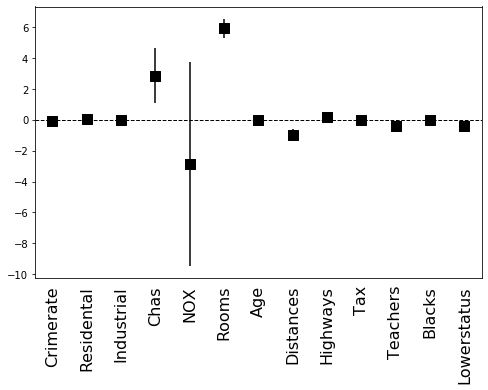

In [ ]:
# Code snippet from  https://zhiyzuo.github.io/Python-Plot-Regression-Coefficient/
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
fig, ax = plt.subplots(figsize=(8, 5))
coef_df.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='none', 
             yerr='err', legend=False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
           marker='s', s=120, 
           y=coef_df['coef'], color='black')
ax.axhline(y=0, linestyle='--', color='black', linewidth=1)
ax.xaxis.set_ticks_position('none')
_ = ax.set_xticklabels(df.columns, rotation=90, fontsize=16)

### Feature importance values

Weight confidence information can be also added to the model's explanation, together with the feature importance values of the individual weights, which can be calculated for a calculated $w_i$ weight as

$$
\frac{w_i}{SE(w_i)}
$$
taking into account both the magnitude and the confidence value of the weight.

### Effect plot

Concentrating exclusively on the weights has an obvious drawback: these values depend on the individual features' units of measurement (if the features are not normalized) -- a weight's size in itself does not reflect how large effect it has on the output value. This problem can be solved by working with the __effect sizes__ of the features. The effect size of a concrete feature value $x_i$ of an instance is simply

$$
w_i x_i.
$$

Using this formula and the standard statistics of the feature values we can visualize the effect sizes of the features in the data sets:

In [ ]:
df_effects = df.drop(columns=["Medval"]) * list(results.params.values)

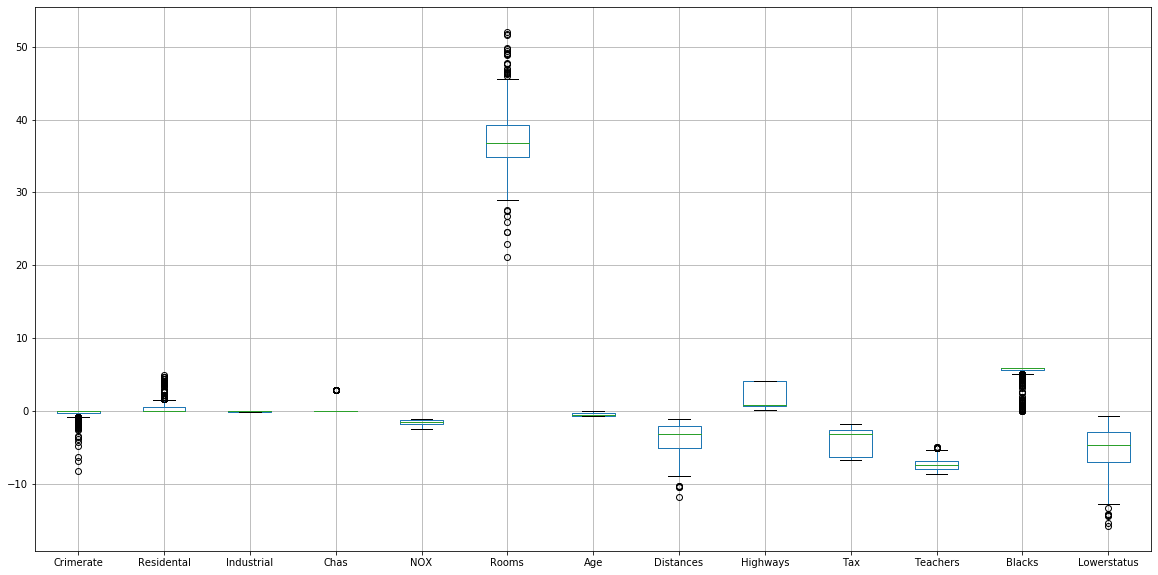

In [ ]:
df_effects.boxplot()

### Effect plot for an individual instance

A global effect plot can also be used to visualize the effect sizes of the features values of a concrete  instance.

E.g., the first data point  of our data set is:

In [ ]:
df.loc[0]

Crimerate        0.00632
Residental      18.00000
Industrial       2.31000
Chas             0.00000
NOX              0.53800
Rooms            6.57500
Age             65.20000
Distances        4.09000
Highways         1.00000
Tax            296.00000
Teachers        15.30000
Blacks         396.90000
Lowerstatus      4.98000
Medval          24.00000
Name: 0, dtype: float64

The effect sizes are

In [ ]:
effects = df.iloc[0,:-1] * results.params.values
effects

Crimerate      -0.000587
Residental      0.876869
Industrial     -0.009379
Chas            0.000000
NOX            -1.543219
Rooms          38.977572
Age            -0.473961
Distances      -3.961223
Highways        0.171151
Tax            -2.781280
Teachers       -6.000521
Blacks          5.916037
Lowerstatus    -2.073196
Name: 0, dtype: float64

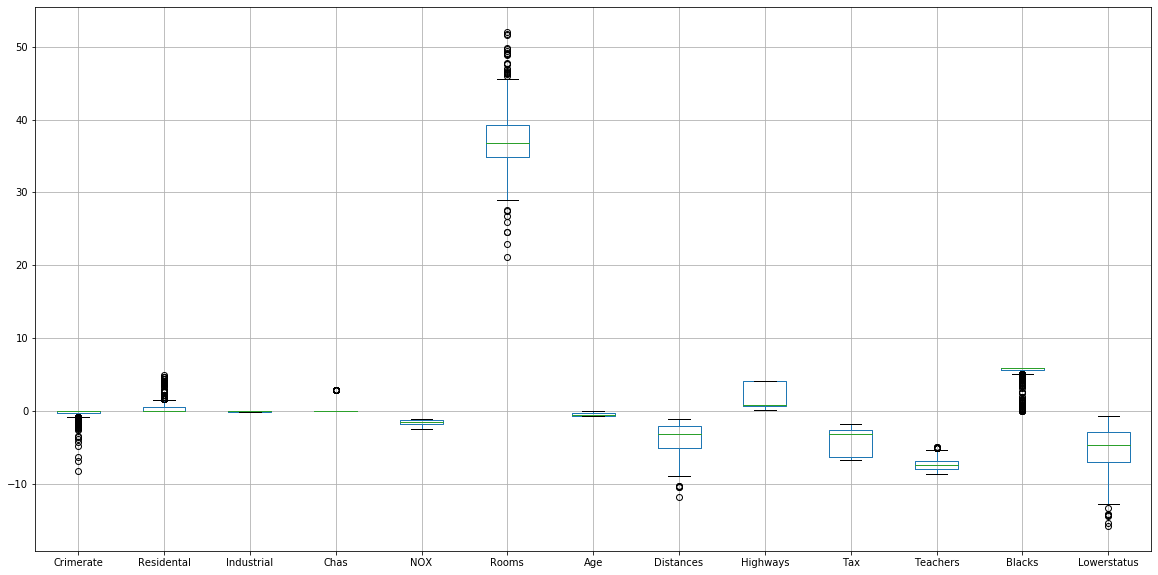

In [ ]:
ax.scatter(x=range(1,14), 
           marker='X', s=120, 
           y=effects, color='red')

subplot = df_effects.boxplot()


## Logistic regression

As we know, logistic regression is a generalized linear model, as it applies a nonlinearity, concretely the logistic (or the softmax function in the case of multinomial logistic regression) to a linear output to get the probabilities of the output. Accordingly, the linear output of the model specifies the __logarithm of the odds__ of the positive result compared to the negative:

$$
\log\left(\frac{\hat P(y=1)}{\hat P(y=0)}\right) = w_0 + w_1x_1 + \dots + w_nx_n
$$

If we increased $x_i$ by 1 then we would change this log odds to 

$$\log\left(\frac{\hat P(y=1)}{\hat P(y=0)}\right) + w_i = \log\left(\frac{\hat P(y=1)}{\hat P(y=0)}\right) + \log(\exp(w_i))= \log\left(\frac{\hat P(y=1)}{\hat P(y=0)} \exp(w_i)\right)$$

This means that a learned weight $w_i$ of the model can be interpreted as specifying that 

> the odds of the positive output change by a factor of $\exp(w_i)$ if the corresponding $x_i$ feature's value is changed by one unit.

## The role of sparsity in the interpretation of linear models

Although in theory the above strategies are usable for linear models where a large number of features have non-zero weights, in practice linear models start to loose their intrinsic interpretability above 10 or so weights, because of the high complexity. The obvious remedy is using sparsity enforcing variants, like the LASSO.

## Decision tree

Decision trees produce their output on the basis of a set of cutoffs in the feature ranges. To continue our ongoing regression example:

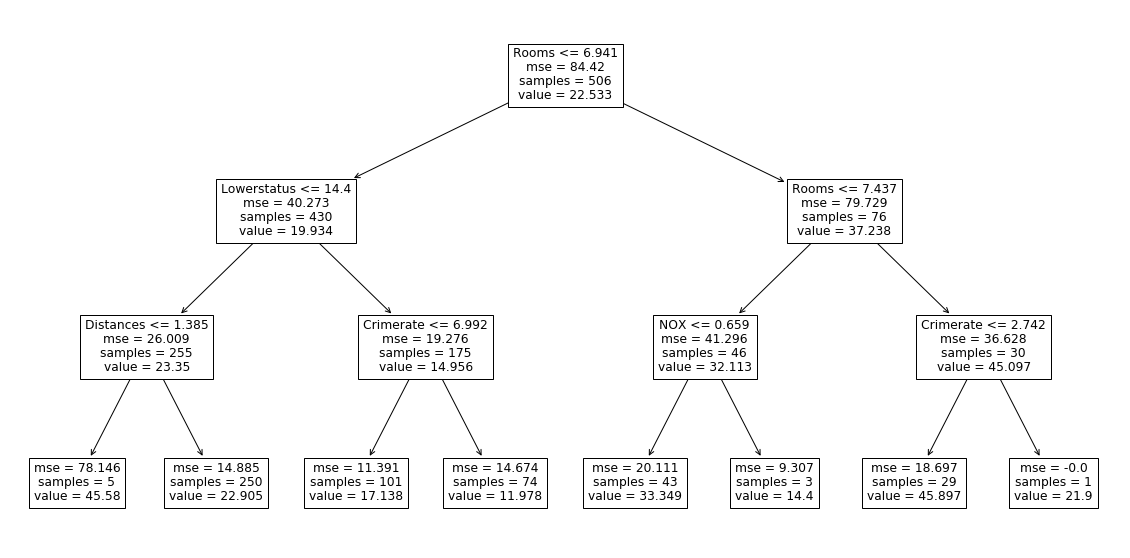

In [ ]:
from sklearn import tree
del clf
clf = tree.DecisionTreeRegressor(max_depth=3)
clf = clf.fit(X, y)
tree.plot_tree(clf, feature_names=df.columns[:-1]);

### Prediction interpretation
The interpretation of the model is straightforward, because the inference algorithm is so transparent: For a concrete data point the prediction is calculated by going in the right direction at the decision points based on the corresponding feature value until a leaf node is reached. The prediction is simply the value specified at the leaf.

In addition, any concrete prediction for a data point can be explained by listing the series of conditions that the instance satisfied, and which jointly led to the predicted value.

### Global feature importance

Feature importance can be calculated by summing up the total reduction of variance (or GINI in case of a  classification tree) by the decision nodes that are based on the feature in question. This total reductions than are typically normalized to add up to 1. In our example:


In [ ]:
for feature, importance in zip(df.columns[:-1], clf.feature_importances_):
    if importance > 0:
        print(feature, importance)

Crimerate 0.04847695997182717
NOX 0.02882440296453761
Rooms 0.6412409777650384
Distances 0.07214729872576442
Lowerstatus 0.2093103605728323


## Feature contributions for an individual data point

For a regression tree, the prediction for an individual instance can be analyzed into feature contributions by tracking the change of the (mean) value of the target variable at the decision points from the root the the corresponding leaf, and summing up the changes for each feature. E.g. for data point with  7.0 rooms and 0.5 NOX value, the feature contributions are as follow:

+ mean value = 22.53
+ rooms > 6.941 => 37.238 -- rooms contributed here 14.708 
+ rooms < 7.437 => 32.113 -- rooms contributed here -5.125
+ NOX < 0.659 => 33.349 -- NOX contributed here 1.236

so, the overall feature contribution of "NOX" is 1.236, while "rooms" has contributed 9.583.

# Model-agnostic methods

As we have seen, some models are intrinsically interpretable, but most machine learning methods produce models that do not have this feature. For these models "external" interpretation strategies have to be used, that do not simply rely on the model's own prediction method. Many of the available strategies are model-agnostic in the sense that they do not rely on any internal (structural or algorithmic) characteristic of the model.

## Partial dependence plot (PDP)

Partial dependence plots show the expected output as a function of the value of one or two features: If for an input  $\mathbf x*$,  $\mathbf f^*$ is the vector of features we are interested in and $\mathbf f'$ is the vector of the remaining features, then the partial dependence function $\hat y_{pd}$ is defined as 

$$
\hat y_{pd}(\mathbf x^*) = \mathbb{E}_{\mathbf x}\hat y(\mathbf[\mathbf x^*[\mathbf f^*], \mathbf x[\mathbf f'])
$$

which can be approximated from the data set as

$$
\hat y_{pd}(\mathbf x^*) \approx  \frac{1}{n}\sum_{i=1}^n \hat y(\mathbf x^*[\mathbf f^*], \mathbf x_i[\mathbf f'])
$$

Separate partial dependence plots for the Rooms and Lowerstatus features with our decision tree model:

/home/simka/anaconda3/envs/course/lib/python3.7/site-packages/sklearn/tree/_classes.py:1233: FutureWarning: the classes_ attribute is to be deprecated from version 0.22 and will be removed in 0.24.
  warnings.warn(msg, FutureWarning)


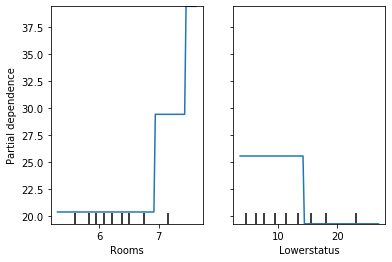

In [ ]:
from sklearn.inspection import plot_partial_dependence
plot_partial_dependence(clf, X, [5,12], feature_names=df.columns[:-1])

A joint partial dependence plot for both features:

/home/simka/anaconda3/envs/course/lib/python3.7/site-packages/sklearn/tree/_classes.py:1233: FutureWarning: the classes_ attribute is to be deprecated from version 0.22 and will be removed in 0.24.
  warnings.warn(msg, FutureWarning)


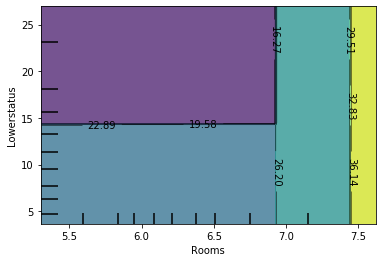

In [ ]:
plot_partial_dependence(clf, X, [[5, 12]], feature_names=df.columns[:-1])

Let's see the same plots for a not intrinsically interpretable (!) random forest model!

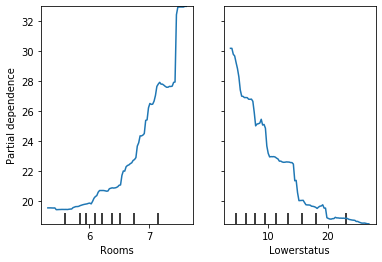

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X, y)

plot_partial_dependence(rfr, X, [5,12], feature_names=df.columns[:-1])

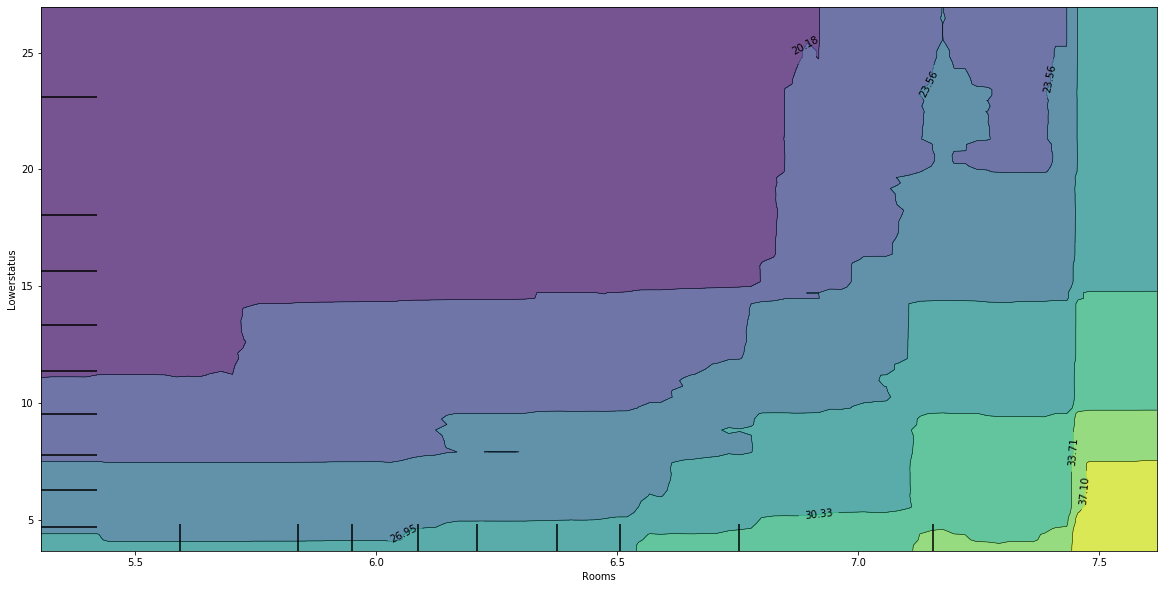

In [ ]:
plot_partial_dependence(rfr, X, [[5, 12]], feature_names=df.columns[:-1])

### Partial dependence plots for categorical features

Partial dependence plots can be used totally analogously to interpret the role of a categorical feature in forming the output -- the only difference is that, obviously, in these cases the plot will have only a finite number of output values -- one for each feature value.

## Individual Conditional Expectation (ICE)

Partial dependence plots are global, in the sense that they provide a global view of the influence of a feature (or a few features) on the model's output -- they do not focus on specific data points. ICE is the individual-focused variant: for a specific datapoint and feature it fixes the the value of all other features and plots how the output changes as a function of the chosen feature's value. 

Formally if the chosen feature is the $i$-th feature, and the instance's features are $\mathbf x = (x_1,\dots,x_{i-1},x_{i},x_{i+1},\dots,x_n)$  then the corresponding ICE function is

$$
\hat y_{\mathbf x}^{ICE}(z) =  \hat y(x_1,\dots,x_{i-1},z,x_{i+1},\dots,x_n)
$$

Typical ICE plots contain not only a single individual's ICE line but several of them, making the feature contributions comparable. Let's apply ICE to the Boston data!

In [ ]:
from pycebox.ice import ice, ice_plot

df_ice = ice(df.drop(columns=["Medval"]), "Rooms", lambda x: rfr.predict(x))
print("df_ice shape:", df_ice.shape)
df_ice.head()

df_ice shape: (446, 506)


data_Rooms     3.561    3.863    4.138             4.368    4.519    4.628  \
Crimerate   4.55587  13.52220 18.49820 20.71620 20.08490 45.74610 18.81100   
Residental      0.0      0.0      0.0      0.0      0.0      0.0      0.0    
Industrial     18.10    18.10    18.10    18.10    18.10    18.10    18.10   
Chas             0.0      0.0      0.0      0.0      0.0      0.0      0.0   
NOX            0.718    0.631    0.668    0.659    0.700    0.693    0.597   
Age            87.9     100.0    100.0    100.0    91.2     100.0    100.0   
Distances     1.6132   1.5106   1.1370   1.1781   1.4395   1.6582   1.5539   
Highways        24.0     24.0     24.0     24.0     24.0     24.0     24.0   
Tax            666.0    666.0    666.0    666.0    666.0    666.0    666.0   
Teachers        20.2     20.2     20.2     20.2     20.2     20.2     20.2   
Blacks        354.70   131.42   396.90   370.22   285.83   88.27    28.79    
Lowerstatus    7.12     13.33    37.97    23.34    30.63    36.98    34.37   
Rooms                                                                        
3.561         25.221   21.535   13.252   12.713    8.909    8.132   16.210   
3.863         25.221   21.535   13.252   12.713    8.909    8.132   16.210   
4.138         25.221   21.535   13.252   12.713    8.909    8.132   16.210   
4.368         25.165   21.471   13.202   12.713    8.859    8.082   16.108   
4.519         25.165   21.331   13.191   12.747    8.812    8.031   16.097   

data_Rooms     4.652    4.880    4.903  ...    8.247    8.259    8.266  \
Crimerate   24.39380 14.33370 2.77974   ... 0.33147  0.36894  0.31533    
Residental      0.0      0.0      0.0   ...     0.0      22.0     0.0    
Industrial     18.10    18.10    19.58  ...    6.20     5.86     6.20    
Chas             0.0      0.0      0.0  ...      0.0      0.0      0.0   
NOX            0.700    0.700    0.871  ...    0.507    0.431    0.504   
Age            100.0    100.0    97.8   ...    70.4     8.4      78.3    
Distances     1.4672   1.5895   1.3459  ...   3.6519   8.9067   2.8944   
Highways        24.0     24.0     5.0   ...     8.0      7.0      8.0    
Tax            666.0    666.0    403.0  ...    307.0    330.0    307.0   
Teachers        20.2     20.2     14.7  ...     17.4     19.1     17.4   
Blacks        396.90   372.92   396.90  ...   378.95   396.90   385.05   
Lowerstatus    28.28    30.62    29.29  ...    3.95     3.54     4.14    
Rooms                                   ...                              
3.561          9.344    9.642   12.849  ...   25.574   24.215   25.241   
3.863          9.344    9.642   12.849  ...   25.574   24.215   25.241   
4.138          9.344    9.642   12.849  ...   25.574   24.215   25.241   
4.368          9.294    9.592   12.849  ...   25.574   24.215   25.241   
4.519          9.245    9.540   12.849  ...   25.574   24.215   25.241   

data_Rooms     8.297    8.337    8.375    8.398    8.704    8.725    8.780  
Crimerate   0.57834  0.57529  1.51902  0.52014  0.61154  0.52693  3.47428   
Residental      20.0     0.0      0.0      20.0     20.0     0.0      0.0   
Industrial     3.97     6.20     19.58    3.97     3.97     6.20     18.10  
Chas             0.0      0.0      1.0      0.0      0.0      0.0      1.0  
NOX            0.575    0.507    0.605    0.647    0.647    0.504    0.718  
Age            67.0     73.3     93.9     91.5     86.9     83.0     82.9   
Distances     2.4216   3.8384   2.1620   2.2885   1.8010   2.8944   1.9047  
Highways        5.0      8.0      5.0      5.0      5.0      8.0      24.0  
Tax            264.0    307.0    403.0    264.0    264.0    307.0    666.0  
Teachers        13.0     17.4     14.7     13.0     13.0     17.4     20.2  
Blacks        384.54   385.91   388.45   386.86   389.70   382.00   354.55  
Lowerstatus    7.44     2.47     3.32     5.91     5.12     4.63     5.29   
Rooms                                                                       
3.561         22.969   25.877   

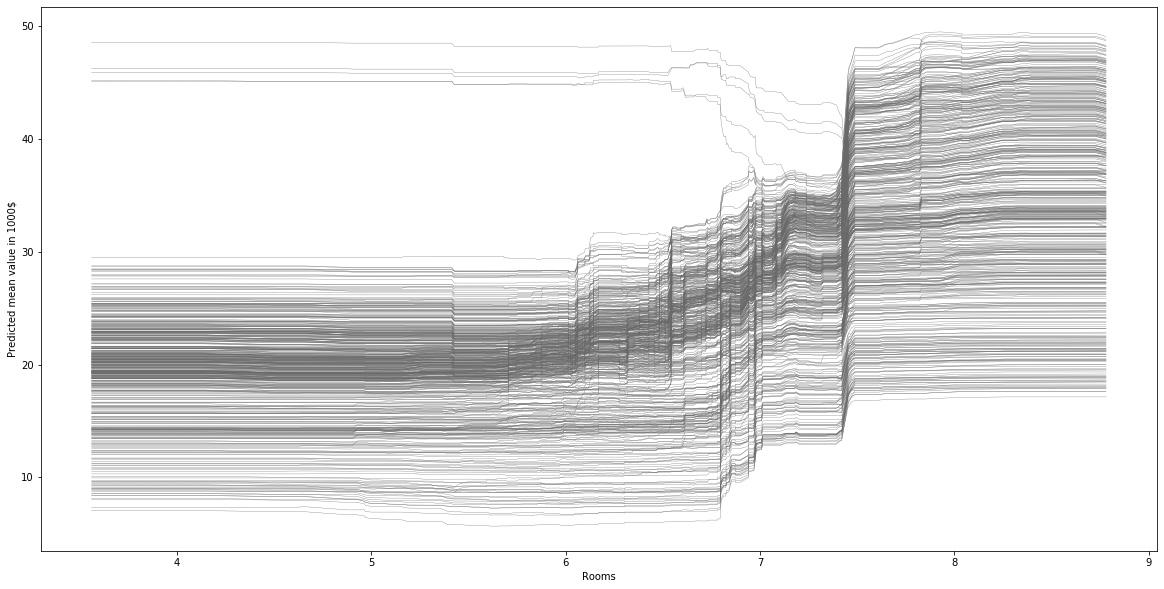

In [ ]:
ice_plot(df_ice, c='dimgray', linewidth=0.3)
plt.ylabel('Predicted mean value in 1000$')
plt.xlabel('Rooms');

With coloring the individual graphs according to another feature value we can visualize possible feature interactions as well. For example, coloring the lines according to "Lowerstatus" we get

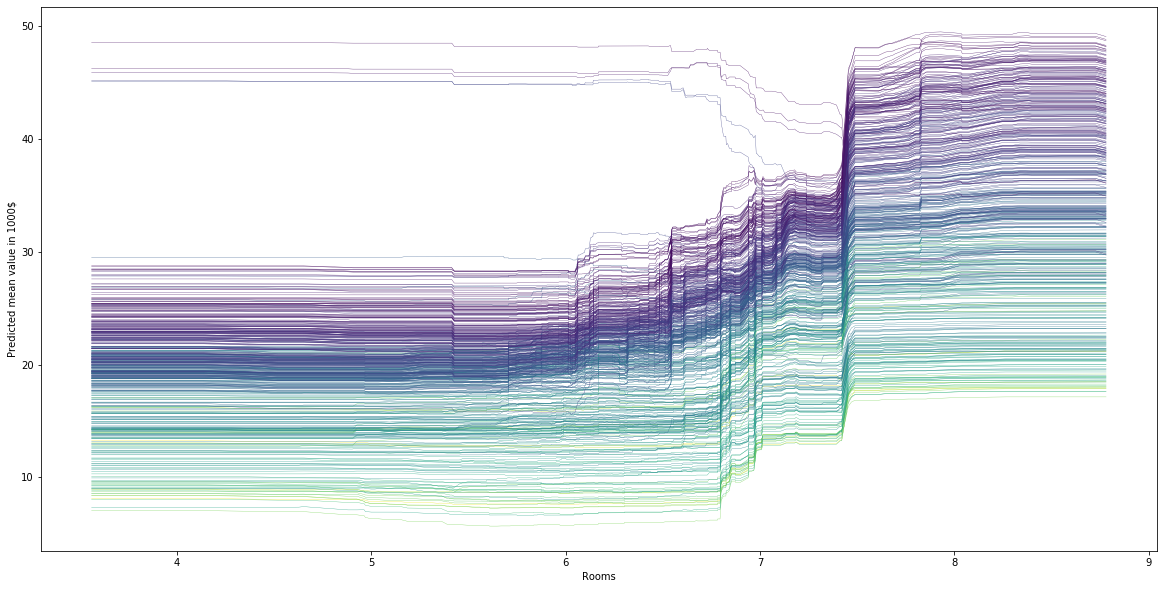

In [ ]:
ice_plot(df_ice, linewidth=0.3, color_by='Lowerstatus')
plt.ylabel('Predicted mean value in 1000$')
plt.xlabel('Rooms');

which gives us a good insight into the interaction between the two features (according to the model).

__Advantages compared to PDP__

The main advantage is that PDP shows only averaged out interactions between the output and the other features in the data. By displaying the full graphs for individual instances ICE can provide a more nuanced picture about feature interactions.

### Centered ICE

As the above plot illustrates, it can be difficult to compare the individual plots as they start from different points. A simple solution to this problem is centering all plots at a single reference point:

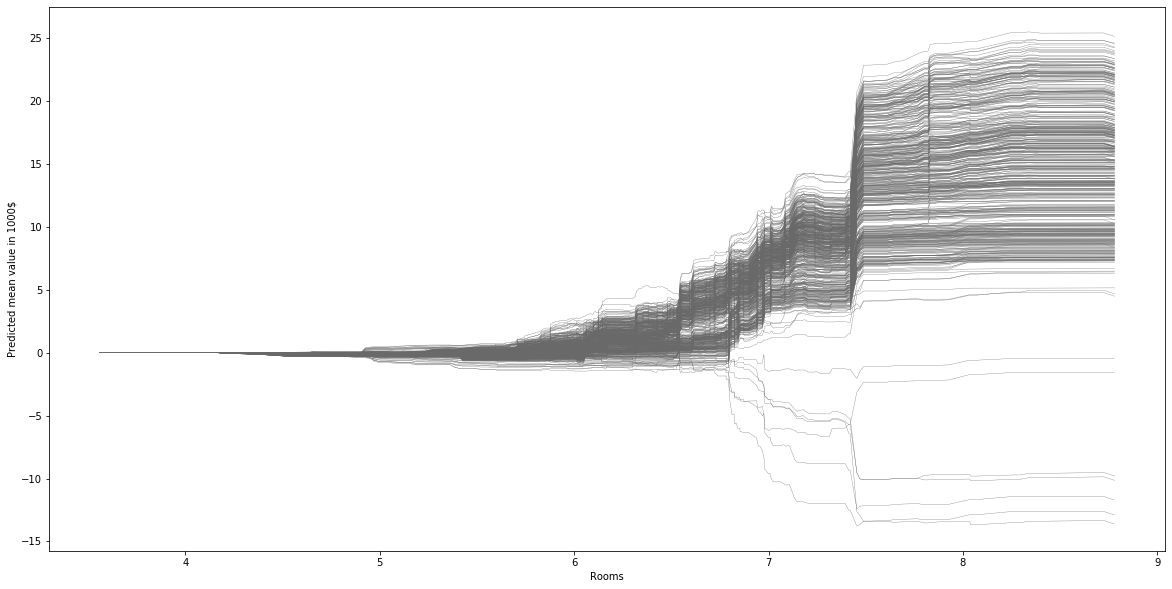

In [ ]:
# Monkeypatching to fix a bug as suggested at https://github.com/AustinRochford/PyCEbox/issues/18
import pycebox.ice
def __get_quantiles(x):
    return np.greater.outer(x, x).sum(axis=1) / x.size
pycebox.ice.__get_quantiles = __get_quantiles
# end monkeypatching

ice_plot(df_ice, c='dimgray', linewidth=0.3, centered=True)
plt.ylabel('Predicted mean value in 1000$')
plt.xlabel('Rooms');

## Accumulated Local Effects (ALE)

A very important problem with PDPs is that they work reasonably only when the feature(s) whose influence on the output is examined are not correlated with other features in the data set. Otherwise, the synthetic data points created by PDP are totally out of touch with the real conditional distribution, and, therefore, the approximations of the expected output values will also be fatally biased, since they are based on unrealistic fictive instances.

The ALE method was explicitly developed to handle the problem of feature correlations:

+ it's not based on unrealistic instances assuming independence, but
+ still disentangles the feature's effect from other (possibly correlated features).

The way it does this is that for each $x_i$ value of the selected feature to be examined, it collects instances in the data set that are close in value for this feature, and for each collected instance it perturbs the value slightly in both directions (e.g. to $x_i + 1$ and $x_i -1$), calculating the difference of the predictions for the two fictive data points. Averaging all these differences for the collected data points ALE produces a good local characterization of the feature's _local effect_ effect around the feature value in question, and all these local effects can be assembled to produce a global graph of the effects of the feature in question.

A bit of demonstration:

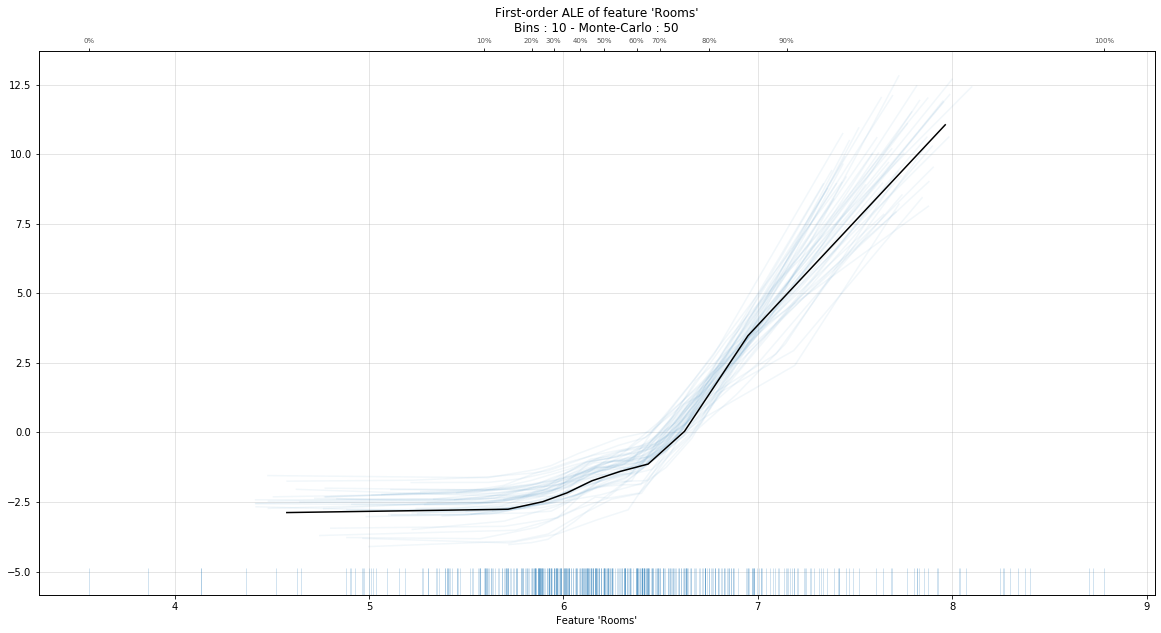

In [ ]:
from alepython import ale_plot
ale_plot(rfr, df.drop(columns=["Medval"]), 'Rooms', monte_carlo=True)

## TODO (time permitting) Feature interaction

## Permutation feature importance

An interesting model-agnostic approach to measuring feature importance for a trained model is feature value permutation: to measure the importance of a specific feature, permute the feature values in the data set, and compare the error of the model on this corrupted data set with that on the original one. More concretely,
the procedure is to calculate the feature importance as the ratio

$$
\frac{e^{perm}}{e^{orig}}
$$
of the errors for all features concerned. (Alternatively, sometimes the difference between the two errors is used.) These scores can, in turn, be used to sort the features in question in an importance order. 

Typically, not only one permutation is used, but several, and the importance scores are calculated by taking their mean. A useful consequence of working with more than one permutations is that the result comes with a kind of confidence metric, since we can calculate the variance/standard error of the measured importance values.

Using [scikit-learn's implementation](https://scikit-learn.org/stable/modules/permutation_importance.html), we can calculate the permutation feature importance scores for our random forest model: 

In [ ]:
# Code is adapted from the scikit-learn example code in the documentation, see
# https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html
from sklearn.inspection import permutation_importance
r = permutation_importance(rfr, X, y, n_repeats=30, random_state=0)

In [ ]:
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
         print(f"{df.columns[i]:<8}"
               f"{r.importances_mean[i]:.3f}"
               f" +/- {r.importances_std[i]:.3f}")

Lowerstatus0.622 +/- 0.053
Rooms   0.477 +/- 0.027
Distances0.118 +/- 0.015
NOX     0.042 +/- 0.003
Crimerate0.041 +/- 0.002
Teachers0.028 +/- 0.004
Tax     0.016 +/- 0.001
Age     0.012 +/- 0.001
Blacks  0.010 +/- 0.001
Industrial0.006 +/- 0.000
Highways0.003 +/- 0.000
Residental0.001 +/- 0.000
Chas    0.000 +/- 0.000


The importance scores can also be visualized as:

/home/simka/anaconda3/envs/course/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  if sys.path[0] == '':


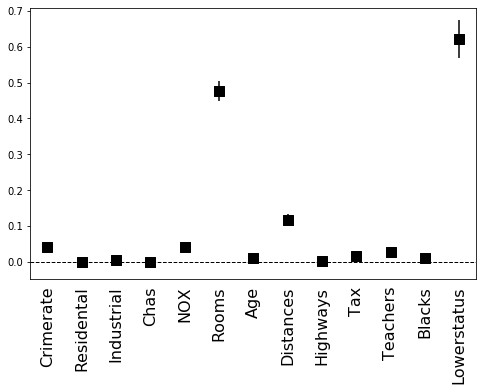

In [ ]:
imp_scores_df = pd.DataFrame({'mean': r.importances_mean,
                            'err': r.importances_std,
                            'varname': df.columns[:-1]
                       })

fig, ax = plt.subplots(figsize=(8, 5))
imp_scores_df.plot(x='varname', y='mean', kind='bar', 
             ax=ax, color='none', 
             yerr='err', legend=False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=pd.np.arange(imp_scores_df.shape[0]), 
           marker='s', s=120, 
           y=imp_scores_df['mean'], color='black')
ax.axhline(y=0, linestyle='--', color='black', linewidth=1)
ax.xaxis.set_ticks_position('none')
_ = ax.set_xticklabels(df.columns, rotation=90, fontsize=16)

## Global surrogate

Although a very important method, conceptually the global surrogate way of model interpretation is very simple: train an __intrinsically interpretable model__ (linear model, decision tree etc.) that approximates the behavior of your original model as much as possible, and use the resulting interpretable model to interpret the original model.

The two practical questions of the method are
- on what data set should the surrogate model be trained, and
- what error metrics should be used?

As for the question of data, it can be your training data set and/or also validation data, but the essential point is that it, obviously, should be representative of the target generating distribution. To speed up training, a sample of the available data can also be used.

The error metrics to be used follow from the task in question, e.g., MSE for regression models, cross-entropy for classification etc. What is important is that the supervised information comes exclusively from the original model's prediction -- the surrogate model has no access to the supervised ground truth in the data set.

An important -- wholly model-agnostic, and easily comparable -- metric for regression is the well known $R^2$, which in this case measures how much of the variance in the original model's prediction is explained by the surrogate:

$$
R^2 = 1 -  \frac{var (\hat y_{model} - \hat y_{surrogate})}{var (\hat y_{model})}
$$

If this value is low then the surrogate is so far from the original model that it is unusable for the model's interpretation.

## Local surrogate (LIME)

In contrast to global surrogates, local surrogates are intrinsically interpretable models used to interpret __individual outputs/decisions__ of a trained black box model. Being a __local__ surrogate means in this context that an intrinsically interpretable model is trained to approximate the black box model, but the approximation concentrates on being precise in the neighborhood of the target: the closer we get to the data point the more precise the approximation should be.

More concretely, LIME (Local Interpretable Model-agnostic Explanations) interprets a black box model output the following way:

+ It maps the target instance into an interpretable feature space  (e.g., a bag of words representation in case of texts, or a super-pixel representation for images). For simple tabular data the original representation might be interpretable without any mapping.
+ It produces a data set consisting of the interpretable representation of the target data point and randomly perturbed versions of it, where perturbation typically consists of randomly removing or replacing meaningful features (words, super-pixels etc.).
+ Calculates the original black box model's predictions for the data set. (Data points are mapped back to the black box model's input space.)
+ Using these predictions as supervised labels, trains an intrinsically interpretable linear model on the (interpretably represented) data set with a special loss, which weights the error of the prediction with the closeness of the data point to the target instance.

The result is an explanation which locally faithfully (around the target instance) shows how the black box model maps the interpretable features of the target instance to a prediction, and specifically shows how the features of the target instance contributed to the model's output.


A few examples:

__Text classification:__

The following image shows LIME explanations for a binary sentiment classifier's output on three different texts.

<a href="https://shiring.github.io/netlify_images/text_explanation_0.png"><img src="https://drive.google.com/uc?export=view&id=1fctZTlgfiBSByNN-QZTF-HH90EC2ZD0C"></a>

(Image source: [Explaining Black-Box Machine Learning Models - Code Part 2: Text classification with LIME ](https://www.shirin-glander.de/2018/07/explaining_ml_models_code_text_lime/))

__Image classification__


<a href="https://adriancolyer.files.wordpress.com/2016/09/explaining-classifiers-fig-4.png"><img src="https://drive.google.com/uc?export=view&id=1C9Z3BZY7zxLTdcGBryO6Q6iPTZf4iEG2"></a>

(Image from the [LIME paper](https://arxiv.org/pdf/1602.04938.pdf))

As the example shows, here visually similar groups (so-called super-pixels) are the binary features that are removed to form the LIME training data set.

### See also

+ The original LIME paper: [Ribeiro et al.: “Why Should I Trust You?”: Explaining the Predictions of Any Classifier](https://arxiv.org/pdf/1602.04938.pdf)
+ A [blog-post explaining LIME](https://www.oreilly.com/content/introduction-to-local-interpretable-model-agnostic-explanations-lime/) from the authors.
+ [The official Python implementation.](https://github.com/marcotcr/lime)

## Shapley values and SHAP

### Shapley values

The notion of Shapley values comes from cooperative game theory: how should we fairly distribute the value resulting from a cooperation between players? Lets denote the value (payoff) received by a coalition set $X$ of players by $v(X)$. The formula proposed by the Noble laureate economist Lloyd Shapley is that each $p$ player from the set $P$ of cooperating players should get a share of 

$$
v_p = \frac{1}{|P|!}\sum_{S \subseteq P \setminus \{p\}}|S|!(|P|-|S|-1)! (v(S\cup \{p\}) - v(S)).
$$

Although the formula is somewhat difficult to decipher, the intuition behind it is simple: we can imagine a lot of ways of forming coalition $P$, when the players join in different orders. Enumerate all this ways (there will be $|P|!$ of them) and calculate the marginal value $p$'s joining the coalition added. The average of all these marginal values is the proposed fair coalition value share for player $p$.

The Shapley values formula has some nice (and provably unique!) properties:

- the shares assigned to the players indeed add up to the total value received by the coalition,
- interchangeable players, who contribute the same in all situations receive the same share,
- "dummy players", who contribute the same value to every coalition that they would achieve alone receive exactly this value, and, finally,
- additivity: if there are two games with value functions $v_1$ and $v_2$ played by the same set of players, and we introduce a combined game in which the payoff values are always $v_1 + v_2$, then the Shapley values for players in this combined games are simply the sums of the Shapley values for two games we started with.

### Shapley values and explaining model predictions

How are Shapley values relevant to interpreting machine learning models? The idea is that for an individual data point with feature vector $\mathbf x^* = \langle x_1,\dots,x_n\rangle$ we can treat the $\hat y$ prediction, which is a numerical value in a regression task or a probability in the case of a classification as game, as if the $x_1,\dots,x_n$ feature values were __cooperating__ to achieve the $\hat y - \mathbb E(\hat y)$ surplus value over the mean prediction  $\mathbb E(\hat y)$. If we conceptualize the model's prediction for the data instance as the result of a game-theoretical cooperation, then we can calculate the individual contributions of the feature values using the Shapley values formula.

The main question is: how should we define and calculate the $v$ value function in the formula for a set of "players", that is, a set of feature values selected from $\langle x_1,\dots,x_n\rangle$? The answer is the one we have already encountered in the case of partial dependence plots: we can fix the values in the set, and take the expected value of the prediction for a random sample of the rest of the features. If $\mathbf x^*$ is our target instance, $S$ is the "coalition set" of features, and $\mathbf f$ are the rest of the features, then

$$
v_{\mathbf x^*}(S) = \mathbb{E}_{\mathbf x}\hat y(\mathbf x^*[S] , \mathbf x[\mathbf f]) - \mathbb{E_{\mathbf x}}\hat y(\mathbf x).
$$
Using this interpretation of "value", we can compute an explanation for a model's $\hat y$ prediction using the Shapley values formula to assign a specific numeric contribution to the prediction's difference from the mean to each individual feature.

__Computing the feature contributions__

Calculating the feature contributions using Shapley values involves calculating expectations over the whole data set for each and every subset of the target instance's feature values, and the number of these subsets grows exponentially with the number of features. Because of this, for larger data sets or a larger number of features this is feasible only if we work with approximations, and both the data set and the feature value sets are randomly sampled, but even Monte Carlo sampling based solutions are very resource hungry, which led to the development of most efficient alternatives.

### Kernel SHAP (SHapley Additive exPlanations)

In essence, Kernel SHAP (described in the paper [A Unified Approach to Interpreting ModelPredictions](http://papers.nips.cc/paper/7062-a-unified-approach-to-interpreting-model-predictions.pdf)) is a clever unification of LIME's method of local linear approximations and the Shapley values method of calculating feature contributions to an individual prediction:

+ __Similarly to LIME__, SHAP maps the instance to be explained to an interpretable binary feature space, and trains a weighted linear model on variants of the target instance in this interpretable space to predict the black box model's outputs.
+ but the weights that are used for the weighted linear model's loss are not LIME's distance metrics, but are chosen so that the resulting model's coefficients for the interpretable binary features approximate the __Shapley values__ of the features.

The result is, similarly to LIME, a list of values for the specific contribution of interpretable features to the prediction for the target instance, but these contributions are now Shapley value approximations, and possess the nice Shapley value properties listed above.


### Tree SHAP 

Kernel SHAP, as we have seen, is entirely model-agnostic, and can be used for any black box model. Nonetheless, some model-specific variants have also been developed which use model-internals to make the computation of SHAP values more efficient. The most important is __Tree SHAP__, which is an exact SHAP calculation method for tree ensemble models (see the paper [Consistent Individualized Feature Attribution for TreeEnsembles](https://arxiv.org/pdf/1802.03888.pdf) for details).

### Implementation

[SHAP](https://github.com/slundberg/shap) is a feature-rich Shapley values-based model interpreter written in Python, which also helps visualizing the produced analyses. E.g., this is a SHAP-produced analysis of the predictions of an image classifier:

<a href="https://raw.githubusercontent.com/slundberg/shap/master/docs/artwork/gradient_imagenet_plot.png"><img src="https://drive.google.com/uc?export=view&id=1Zh6vo8acvKhO9Drmc4NIZL8WjXOknMhK" width="600px"></a>

(Image source: [SHAP Python implementation GitHub page](https://github.com/slundberg/shap))

## Using local interpretations for global model implementation

Local analyses for several specific data instances provided by methods like LIME or Kernel SHAP can be used for global model implementation as well, e.g. by averaging the absolute value of the feature contribution values calculated by LIME or a SHAP method over a data set or a sample of it it is possible to compute a global feature importance value. 





# Example-based interpretation methods

Example-based methods explain/provide insight into the local or global behavior of a model by generating and presenting special data instances with certain distinguishing properties.

## Counterfactual instances

### Counterfactual explanations

Counterfactual explanations explain an event (state of affairs) by presenting an alternative, against the facts scenario that would have been very close to the factual one but in which the event/state of the affairs had not occurred. The implication is that the difference(s) (missing or additional elements) explain the event:

> If component(s) $F$ had been different in $X$ then $Y$ would not have occurred (but, instead of it, $Y'$).

In many cases these types of explanations are intended to be __causal explanations__ identifying a __cause__ of the state of affairs to be explained.

### Application to model interpretation

In the context of interpreting the output of a machine learning model, counterfactual explanations of a $\hat y$  output for an $\mathbf x$ instance can be provided by producing an $\mathbf x'$ instance, which differs from $\mathbf x$ only __in a few interpretable features__,  but still leads to a significantly different $\hat y'$ output.

This leads to the following optimization problem: for an $\mathbf x$ data point and $\hat y$ model output, find an $\mathbf x'$ instance which minimizes the following loss:

$$
L(\mathbf x') = L_{\mathrm{prediction}}(\mathbf x') + \lambda L_{\mathrm{distance}}(\mathbf x')
$$
where 
- $L_{\mathrm{prediction}}$ measures whether the prediction for $\mathbf x$ is at a suitable distance from that for $\mathbf x$. Suitable distance might mean simply a significantly larger probability for a  different class in the case of a classifier, or a prediction further than a given threshold in the case of a regression model.
- $L_{\mathrm{distance}}$ represents the requirement that $\mathbf x'$ should differ only by a few interpretable features from $\mathbf x$, and
- $\lambda$ is a hyperparameter controlling the weighting of the two components.

The optimization problem can be solved by generic search methods that do not make use of the model's internals, or using model-specific approaches. In the case of deep learning models with accessible gradients gradient descent can also be used.

### Implementation TODO: MNIST example with Alibi

[Alibi](https://github.com/SeldonIO/alibi) is a Python model inspection and interpretation library which contains counterfactual instances interpretations, both a generic black box and a Keras specific version.

### A note on adversarial examples

The notion of counterfactual instances and the techniques used to find them are very similar that of __adversarial examples__, that is, instances that are small perturbations of typical, well handled instances which mislead the model into producing an incorrect output. A famous example is adding -- with the naked eye unnoticeable -- white-like noise to images:

<a href="https://devblogs.nvidia.com/wp-content/uploads/2019/06/fgsm-625x254.png"><img src="https://drive.google.com/uc?export=view&id=1n2XTO79mQey4F4SDBLTQg63FZZSS4Qx-"></a>

(Image source: [Goodfellow et al. (2015): Explaining and Harnessing Adversarial Examples](https://arxiv.org/pdf/1412.6572.pdf))

Adversarial examples obviously provide very important information about a model, especially about its vulnerabilities, but they differ from proper counterfactual instances in two important ways:
- the model's output has to be obviously incorrect for the instance, and 
- the difference between the original data point and the adversarial example is not required to be in terms of interpretable features, and it is frequently not, as the previous figure showed.

## Prototypes and criticisms

The instance-focused interpretation methods we have seen so far did not provide any principled answer to the question: to which data points in our data sets should we apply these interpretation methods?

### Prototypes

A possible answer is to focus our attention to __prototypes__, that is, a limited number of data points that are together representative of the data distribution. Moreover, a good set of prototypes for the inputs of a supervised model together with the model's predictions may in itself provide a useful interpretation of (insight into) the model's behavior.

Prototypes can be produced
+ by __clustering the data set__, in which case the prototypes will simply be the data points closest to the cluster centroids. (There are $K$-means variants that are guaranteed to produce cluster centers from the data set, see, e.g., the [$K$-medoids](https://en.wikipedia.org/wiki/K-medoids) algorithm.) 
+ or by specialized methods that try to minimize the difference between the prototypes' distribution and the data distribution -- an example follows shortly.

### Criticisms

While prototypes are representative of data set in the sense that they are cluster points in dense regions, being a __criticism__ is relative to a set of prototypes and refers to a data point which is not represented properly by any of the prototypes in question because it lies far from any of them, in a smaller cluster:

<a href="https://christophm.github.io/interpretable-ml-book/images/unnamed-chunk-43-1.png"><img src="https://drive.google.com/uc?export=view&id=1oxzlIHGTbo4xTZU4zqdppkuenxHbgc_8" width="700"></a>

(Image source: [Molnar: Interpretable Machine Learning ](https://christophm.github.io/interpretable-ml-book/proto.html))

Criticism provide a useful counterbalance to prototypes for the characterization of the data set's distribution.

### MMD-critic

In contrast to prototypes, there are not many algorithms to find criticisms in a data set. A recently developed solution is MMD-critic, which uses Maximum Mean Discrepancy (MMD) (see [Kernel embedding of distributions](https://en.wikipedia.org/wiki/Kernel_embedding_of_distributions) for some details) to measure the difference between the distributions of the data set and prototype candidates. In addition to finding prototypes, MMD-critic can also identify corresponding criticisms -- see the MMD-critic paper, [Kim et al. (2016): Examples are not Enough, Learn to Criticize!Criticism for Interpretability](http://people.csail.mit.edu/beenkim/papers/KIM2016NIPS_MMD.pdf) for details. Two examples from the paper:

<a href="https://christophm.github.io/interpretable-ml-book/images/proto-critique2.jpg"><img src="https://drive.google.com/uc?export=view&id=1tJCzwSwtCOHvZFbXdGCAZHo999eZ8ayu" width="600px"></a>

<a href="https://christophm.github.io/interpretable-ml-book/images/proto-critique.jpg"><img src="https://drive.google.com/uc?export=view&id=1c6hHktwonusIMUhQgYPzsMy17B1uRruG"></a>

__Implementation__

Unfortunately, currently only demonstration-level code is available, which was used for the paper, see the [GitHub repository](https://github.com/BeenKim/MMD-critic).

## Influential instances

Prototypes (and criticisms) are distinguished instances of the data set, but their status is determined exclusively by their position in the input data, regardless of the supervised data and the model's output. __Influential data points__, on the other hand, are distinguished from the point of a model's output: they have a __significantly larger influence on the model's outputs and parameters than others.__

Identifying and examining influential instances in detail can help debugging and validating our model, and also assessing how robust it is.

How can the influence of a data point be measured?

### Instance deletion

The most obvious method is to delete the instance whose influence we want to calculate and retrain the model. With both the original and the retrained model at hand, we can measure the instance's influence by calculating a kind of distance between the two. Commonly used metrics are

- __Cook's distance__: the (scaled) sum of squared differences between the two models' predictions on the data set:
$$
D_j = \frac{\sum_{i=1}^n(\hat y_i - \hat y_i^{-j})^2}{p \mathrm{MSE}}
$$
where the denominator, which is common to all data instances is the product of the data dimensionality and the MSE of the original model.
- __(simple) Influence__: the average difference between the predictions: 
$$
\frac{1}{n}\sum_{i=1}^n|\hat y_i - \hat y_i^{-j}|
$$
This doesn't differ much from Cook's distance. One of its advantages is that it doesn't rely on MSE, which does not necessarily make sense for some model types, e.g. for classifiers.

- __DFBETA__: the $\Theta - \Theta^{-j}$ difference between the weight vectors of the the two models. Obviusly, this metric can be used for parametric models containing weights, e.g. for linear models or neural networks.

### Influence functions

Instance deletion methods have a huge drawback: they require a full training of the model for each instance whose influence we wish to calculate. While for relatively simple models (e.g., linear regression) this may not be a problem, it is obviously an unfeasible way of calculating the influence of data instances on deep neural networks, especially in the case of larger data sets.

Fortunately, for parametric models with a twice-differentiable loss function there is a way of calculating influence which does not require full retraining. With the well known "empirical risk minimization" method, the optimal model parameters are

$$
\hat \theta = \operatorname{min}_{\theta} \sum_{i=1}^n \frac{1}{n}L( z_i, \theta)
$$
where our data set consists of $z_i = \langle \mathbf x_i,y_i \rangle (i\in [1\dots n])$ pairs. It turns out that it is relatively easy (at least does not require retraining) to compute for a data point in our data set, say $z = \langle x,y  \rangle$, the __amount with which the optimal parameters would be different__ if we changed the weighting of $z_j$ with a very (in fact infinitesimally) small $\epsilon$ amount, $\theta_{z, \epsilon} - \theta$ where
$$
\hat \theta_{z, \epsilon} = \operatorname{min}_{\theta} \sum_{i=1}^n \frac{1}{n}L(z_i, \theta) + \varepsilon L(z, \theta).
$$
The simple(?) answer is that the difference is approximately
$$
-H_{\hat{\theta}}^{-1}\nabla_{\theta}L(z,\hat{\theta}),
$$
where $H$ is the Hessian matrix (matrix of second derivatives) of the loss at $\hat \theta$, and $\nabla_{\theta}L(z,\hat{\theta})$ is the gradient of the loss for the data point $z$.

Although approximating the Hessian is computationally challenging, it can be approximated efficiently, and, more importantly, it has to be computed only once for the whole data set! Unlike instance deletion, calculating this kind of influence, the so called __influence function__ for several data points does not require model retraining  for each instance, only the Hessian and the individual loss gradients.

#### Calculating training instance influence on test instance loss

Perhaps the most important use of influence functions is that they make it possible to calculate the degree to which small changes in the weighting of training instances would __influence individual predictions__, since the influence on the loss on specific test instances can also be approximated using the influence function, by multiplying it with the loss gradient on the test instance:
$$
\operatorname{LossInfluence}(z,z_{test})=-\nabla_{\theta}L(z_{test},\hat{\theta})^T{}H^{-1}_{\theta}\nabla_{\theta}L(z,\hat{\theta})
$$
Inspecting this value for interesting $z_{test}$ instances can provide important insights into what and how a model learned from the data set. E.g., the following example:

<a href="https://i2.wp.com/mlexplained.com/wp-content/uploads/2018/06/influence_vs_euclidean.jpg"><img src="https://drive.google.com/uc?export=view&id=1MoxW0q4vzCE74XIv3XbQvuhzfJTuOxTH"></a>

(Image source: [Koh ad Liang (2017): Understanding Black-box Predictions via Influence Functions](https://arxiv.org/pdf/1802.01528.pdf))

shows that contrast between two dog vs fish classifiers, an SVM and Inception variant: the latter learned semantic features while the former bases its predictions on Eucledian distance.

#### Further reading

- In the context of black box model interpretation, the central paper on influence functions is [Koh ad Liang (2017): Understanding Black-box Predictions via Influence Functions](https://arxiv.org/pdf/1703.04730.pdf)
-  [Paper Dissected: Understanding Black Box Predictions via Influence Functions Explained](http://mlexplained.com/2018/06/01/paper-dissected-understanding-black-box-predictions-via-influence-functions) is a nice blog post explaining the paper.


# Interpreting deep neural networks

Evidently, the model-agnostic methods we have discussed previously can be used for interpreting some deep neural networks, and some of them (e.g., LIME, gradient-based influence functions) are highly suitable for DNN-interpretation, but most model-agnostic methods have important limitations when it comes to DNNs:

- many model-agnostic methods were developed for tabular data, and are not really applicable to the types of input on which deep neural networks are frequently run, e.g., images or (variable length) word sequences.
- model-agnostic methods -- by their nature -- cannot interpret the __components__ of deep nets: neurons, layers etc.

Recently these problems have led to the development of a large number of neural network-specific interpretation methods. Convolutional image processing has had a disproportionate share in this research area, and our discussion will follow this emphasis, but many methods can relatively easily be adapted to other types of networks and tasks.

## The problem 

One of the most advertised advantages of "end-to-end deep learning" has been that DNN models do not require manual feature engineering, as these networks learn useful features "by themselves" during the training. But how can we actually inspect what kind of features are learned? It would help tremendously our understanding of __why and how__ a DNN produces a certain output in response to a specific input or a class of inputs if we could explain the role of individial components of these networks. 

There is a widely (but not universally) shared assumption among DNN researchers and practitioners that

> neural networks consist of meaningful, understandable features. Early layers contain features like edge or curve detectors, while later layers have features like floppy ear detectors or wheel detectors. 

(From [Olah et al (2020) Zoom In: An Introduction to Circuits](https://distill.pub/2020/circuits/zoom-in/))

But how can we actually access their proper interpretation if they are indeed meaningful and understandable?

## Feature visualizations

How can we know that in CNN visual classifiers "Early layers contain features like edge or curve detector" as the above quote says? 

### Looking at weights

Conveniently, in the first layer we can frequently look at the filter weights themselves and simply "read" what they detect:

<a href="https://cs231n.github.io/assets/cnnvis/filt1.jpeg"><img src="https://drive.google.com/uc?export=view&id=1rRiMyxsRf-YfTo86KddYWvLc-dfE4vsi" width="400px"></a>

(AlexNet filter weights in the first layer. Image source: [Visualizing what ConvNets learn](https://cs231n.github.io/understanding-cnn/))

But these filters work directly on image inputs, and neuron weights in later layers are not that transparent, as they process internal features:

<a href="https://cs231n.github.io/assets/cnnvis/filt2.jpeg"><img src="https://drive.google.com/uc?export=view&id=1CGkYBgQAN56kHj68Fiqx1qJhcJzYzE3Q" width="100%"></a>

(AlexNet filter weights in the 2nd layer. Image source: [Visualizing what ConvNets learn](https://cs231n.github.io/understanding-cnn/))


### High activation input

So-called feature visualization methods solve this problem by trying to find data instances that activate the component in a distinguished way, e.g., elicit a very high activation from a neuron, ensemble of neurons or a whole layer. The typical method is to find a suitable objective, e.g. that of maximizing the activation of a concrete neuron,and find the maximum, either

- by searching in the available data set, or
- by searching in the entire input space of the network, i.e. synthetically generating the maximally activating input.

The first solution is simpler, but has a problem with correlated features: if a neuron is activated exclusively by feature $f_1$ but it always occurs together with feature $f_2$ in the data set, then our visualization cannot disentangle it from $f_2$.

The second solution, which does not have this problem is to start from random noise as an initialization and search for the optimal image by gradient descent/ascent:

<a href="https://christophm.github.io/interpretable-ml-book/images/activation-optim.png"><img src="https://drive.google.com/uc?export=view&id=1xRLjiefL280eHv_Y4iWo5lVUPEfaS8oE"></a>

(Image source: [Olah et al (2017): Feature Visualization](https://distill.pub/2017/feature-visualization/))

that is, search for

$$
\operatorname{argmax}_{image}h_{n,x,y,z}(image)
$$

(where $h_{n,x,y,z}(image)$ denotes the activation of the individual convolutional neuron at layer $n$, channel $z$ and position $(x, y)$)

Similar objectives can be used to visualize features that cause the largest (mean) activation in larger or different  components:

<a href="https://miro.medium.com/max/1400/1*cUx1gwyFqziTntSWeFCmAg.png"><img src="https://drive.google.com/uc?export=view&id=1fdxd6RDQsQ4c0r1pvyM0oiv4UDETFYoT"></a>

(Image source: [Olah et al (2017): Feature Visualization](https://distill.pub/2017/feature-visualization/))

Perhaps the most striking images are found by the layerwise so called "DeepDream" objective which seeks to maximize the mean activation of a whole layer.

This kind of visualization does well in terms of disentangling correlated features:

<a href="http://www.shallowmind.co/images/tree_regularization/feature-viz.png"><img src="https://drive.google.com/uc?export=view&id=1I3piV38Xtui8xm6fqqoJuWkAfhqrSG99"></a>

(Image source: [Olah et al (2017): Feature Visualization](https://distill.pub/2017/feature-visualization/))

#### Optimization details

__Regularization__. Although the core idea is relatively simple, naive attempts can run into difficulties, because vanilla optimization from scratch frequently leads to "cheating" images with high frequency noise that cannot really be related to images occurring in real life. The solution is to add suitable regularization terms expressing the "real life" constraints, e.g. penalizing high frequency noise, requiring robustness under certain transformations or using learned "real life priors". (See the [Feature Visualization](https://distill.pub/2017/feature-visualization/) paper for details.)

__Generating diverse images__. Another problem with simple generation is that in practice, generating a single image is often insufficient, because the result can have accidental features not essential to activating the target. Because of this, it is customary to generate several diverse images, where diversity is carefully calibrated in the objective function:

<a href="https://distill.pub/2017/feature-visualization/images/diversity/mixed4a_143_diversity.png"><img src="https://drive.google.com/uc?export=view&id=19OOAb-vR8jq306nAPED_gjEIq7VZXU8I"></a>

(Image source: [Olah et al (2017): Feature Visualization](https://distill.pub/2017/feature-visualization/))

### Visualizing feature interactions

Although individual neurons might correspond to interpretable features, they correspond only to one dimension/axis in an embedding space, and there can be many other directions (linear combinations) that are also interpretable. (Anecdotally, researchers found the basis (one-neuron) directions a bit more frequently interpretable, bit found many examples of interpretable feature interactions.

Random directions in the feature space can be visualized by the similar methods that we have discussed so far (generate images with the linear combination of the one-neuron objective), and visualizing __successive interpolations__ between individual neurons can also be very educating regarding their interactions.

Continuing in this direction, it is possible to visualize whole activation vectors across all channels at a certain $(x,y)$ position in a layer -- the objective in this case is to maximize the dot product of the produced activations with the required activations.

### Putting it together

__Activation grids for individual images__

Using these activation vector visualizations, it is possible to produce full visualizations of a layer's output activations on a specific image. For instance, for an input image  like

<a href="https://distill.pub/2018/building-blocks/examples/input_images/dog_cat.jpeg"><img src="https://drive.google.com/uc?export=view&id=1dDPkrZf-Z_WlzuzZ4MahA9s6t_8_yuHv"></a>

the result is

<a href="https://distill.pub/2018/building-blocks/examples/activations/dog_cat/mixed4d.jpeg"><img src="https://drive.google.com/uc?export=view&id=1Y03OvWDGZ9mk6_Bf5QUpTHKFM0tzSgM-"></a>

(Images source: [Carter et al. (2018): The building blocks of interpretability](https://distill.pub/2018/building-blocks/))

__Activation maps__

Another, related, directon which has been explored using the visualization of activation vectors in a layer is to collect all "natural activations" using a data set, project them to a 2d map using t-SNE/UMAP, divide the map by a grid and visualize the grid cells by visualizing  the average activations of the points that lie there. The result is a map of the the feature space of the layer with details like this:

<a href="https://storage.googleapis.com/activation-atlas/build/process/render/render--x=0--y=0--tries=4--alpha=False--tile_size=10--whiten=true--steps=2048--icon_size=80--grid_size=10--layout=50_0.05_cosine--class_filter=None--filter=30000--layer=mixed4c--model=InceptionV1--sample_images=1000000--sample_type=random.jpg"><img src="https://drive.google.com/uc?export=view&id=1QsLxDsrIiUQOeAS19RT6LG70mhM0nNrw" width="600px"></a>

(Image source: [Carter et al. (2019): Activation Atlas](https://distill.pub/2019/activation-atlas/))

### Further reading

The above discussion was almost entirely based on papers published in the online journal [Distill](https://distill.pub), and all of them are worth reading in full:

- [Olah et al (2017): Feature Visualization](https://distill.pub/2017/feature-visualization/)
- [Carter et al. (2018): The building blocks of interpretability](https://distill.pub/2018/building-blocks/)
- [Carter et al. (2019): Activation Atlas](https://distill.pub/2019/activation-atlas/)

## Network dissection

The feature visualization methods we have seen so far do not attempt to explicitly interpret network components in terms of represented features/concepts -- they leave it to viewers of the visualizations to draw conclusions about the interpretations. This fact has some advantages -- feature visualizations do not rely on supervised information over and above the trained network -- but leads to problems when one wants objective, measurable information about the interpretability, and concrete interpretations of the components of a network.

The method of __Network dissection__, introduced in the paper [Bau et al (2017): Network Dissection: Quantifying Interpretability of Deep Visual Representations](https://arxiv.org/pdf/1704.05796.pdf), solves this problem using a data set of images which are densely (possibly pixel-wise) labeled with appropriate concepts of different level (texture, object etc.). For example Broden (Broadly and Densely Labeled Dataset) is such a data set: it contains 60000 images labeled with more than 1000 visual concepts of different abstraction levels: 468 scenes, 585 objects, 234 parts, 32 materials, 47 textures and 11 colors:

<a href="https://christophm.github.io/interpretable-ml-book/images/broden.png"><img src="https://drive.google.com/uc?export=view&id=1OKwv2F3d0V-nh7INCuhBgQHf-l9Jn-qx" width="600px"></a>

(Images from Broden. Source: [Bau et al (2017): Network Dissection: Quantifying Interpretability of Deep Visual Representations](https://arxiv.org/pdf/1704.05796.pdf))

Using a data set like Broden it is possible to algorithmically find connections between the data set's concepts and CNN neurons by

- running the network on all images in the data set, and
- creating binary per-neuron activation masks for all images using an activation threshold, finally
- comparing the activation maps with the annotations' binary concept maps for the same image.

The comparison of a concept and an activation map consists of two steps:

- upscaling the (typically possibly smaller) activation mask to the size of the input image-sized concept maps
- calculating their similarity, e.g. by computing their __Jaccard similarity,__ i.e., the ratio of the intersection and union of the pixels that are activated vs concept-positive:

With these similarities at hand, we can define a correlation score for any concept--neuron pair by simply taking the average Jaccard similarity between the two on the whole data set. Finally, using an appropriate threshold it is possible to define precisely when a neuron can be considered to be a __detector__ of the concept in the data set. E.g., these are some activation masks of a "dog detector neuron":

<a href="https://christophm.github.io/interpretable-ml-book/images/dissection-dogs.jpeg"><img src="https://drive.google.com/uc?export=view&id=16_HCxh2WCTBP0Qg6aHStUQepl6exvEKz"></a>

(Image source: [Bau et al (2017): Network Dissection: Quantifying Interpretability of Deep Visual Representations](https://arxiv.org/pdf/1704.05796.pdf))

__Results__

In addition to introducing the method, the [paper](https://arxiv.org/pdf/1704.05796.pdf) conducted a number of experiments with some interesting results:

- (as has been long suspected) earlier layers detect lower level concepts (texture etc.) while later layers higher level ones (objects, scenes)
- there can be many neurons detecting the same concept, e.g., VGG trained on ImageNet had 95 dog detectors
- among the examined architectures ResNet (the widest network) had the most unique concept detectors.